In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [4]:
# Load the dataset
file_path = "customer_support_tickets.csv"
df = pd.read_csv(file_path)

In [12]:
# Data Preprocessing
## Convert Date Columns
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], errors='coerce')
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')

## Handle Missing Values
df['Resolution'] = df['Resolution'].fillna("No Resolution")
df['Customer Satisfaction Rating'] = df['Customer Satisfaction Rating'].fillna(df['Customer Satisfaction Rating'].mean())

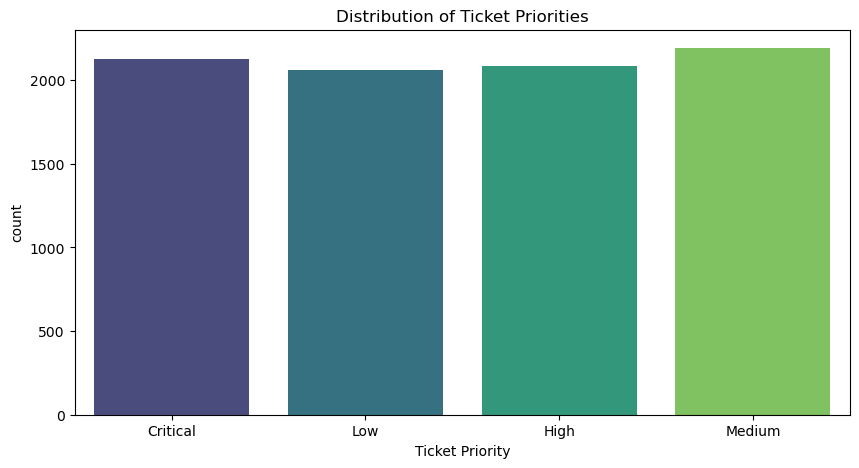

In [16]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,5))
sns.countplot(x='Ticket Priority', data=df, hue='Ticket Priority', palette='viridis', legend=False)
plt.title("Distribution of Ticket Priorities")
plt.show()



In [18]:
# Feature Engineering
## Encoding Categorical Variables
encoder = LabelEncoder()
df['Customer Gender'] = encoder.fit_transform(df['Customer Gender'])
df['Ticket Priority'] = encoder.fit_transform(df['Ticket Priority'])

In [20]:
# Model Building
X = df[['Customer Age', 'Customer Gender', 'Ticket Priority']]
y = df['Customer Satisfaction Rating'].apply(lambda x: 1 if x >= 3 else 0)  # Binary Classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Model Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7857142857142857
Confusion Matrix:
 [[1323   21]
 [ 342    8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.98      0.88      1344
           1       0.28      0.02      0.04       350

    accuracy                           0.79      1694
   macro avg       0.54      0.50      0.46      1694
weighted avg       0.69      0.79      0.71      1694



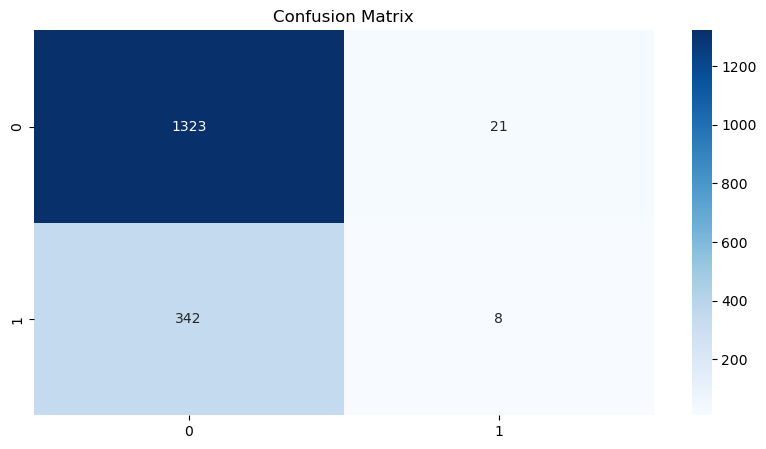

In [24]:
# Visualization
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()